# Prueba Científico de Datos
#### Obj: Predecir si un cliente aceptará una tarjeta de crédito básandose en datos Demográficos, sociales, financieros, negocios
Nikolas Sebastián Rodriguez
Cel: +57 314 3798686

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Análisis Exploratorio

In [227]:
df = pd.read_csv('../data/interim/train.csv')
df.head()

,ID,Edad,Tipo_Trabajo,Estado_Civil,Educacion,mora,Vivienda,Consumo,Contacto,Mes,Dia,Campana,Dias_Ultima_Camp,No_Contactos,Resultado_Anterior,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,1,57,servicios,casado,bachillerato,unknown,no,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
1,2,37,servicios,casado,bachillerato,no,si,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
2,3,40,administrador negocio,casado,primaria,no,no,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
3,4,56,servicios,casado,bachillerato,no,no,si,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
4,7,25,servicios,single,bachillerato,no,si,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23099 entries, 0 to 23098
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  23099 non-null  int64  
 1   Edad                23099 non-null  int64  
 2   Tipo_Trabajo        23099 non-null  object 
 3   Estado_Civil        23099 non-null  object 
 4   Educacion           23099 non-null  object 
 5   mora                23099 non-null  object 
 6   Vivienda            23099 non-null  object 
 7   Consumo             23099 non-null  object 
 8   Contacto            23099 non-null  object 
 9   Mes                 23099 non-null  object 
 10  Dia                 23099 non-null  object 
 11  Campana             23099 non-null  int64  
 12  Dias_Ultima_Camp    23099 non-null  int64  
 13  No_Contactos        23099 non-null  int64  
 14  Resultado_Anterior  23099 non-null  object 
 15  emp_var_rate        23099 non-null  float64
 16  cons

In [4]:
df.describe()

,ID,Edad,Campana,Dias_Ultima_Camp,No_Contactos,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000
mean,16420.136499,40.067665,2.560154,962.976060,0.171003,0.095649,85576.471847,-40.485237,3190.939789,5167.329439,0.112126
std,9521.074915,10.449983,2.756954,185.675409,0.494079,1.565650,26224.436234,4.629643,2088.703058,72.260805,0.315528
min,1.000000,18.000000,1.000000,0.000000,0.000000,-3.400000,93.200000,-50.800000,0.634000,4963.600000,0.000000
25%,8158.000000,32.000000,1.000000,999.000000,0.000000,-1.800000,92893.000000,-42.700000,1281.000000,5099.100000,0.000000
50%,16375.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93876.000000,-41.800000,4856.000000,5191.000000,0.000000
75%,24644.500000,47.000000,3.000000,999.000000,0.000000,1.400000,93994.000000,-36.400000,4961.000000,5228.100000,0.000000
max,32967.000000,95.000000,42.000000,999.000000,6.000000,1.400000,94767.000000,-26.900000,5045.000000,5228.100000,1.000000


<AxesSubplot:>

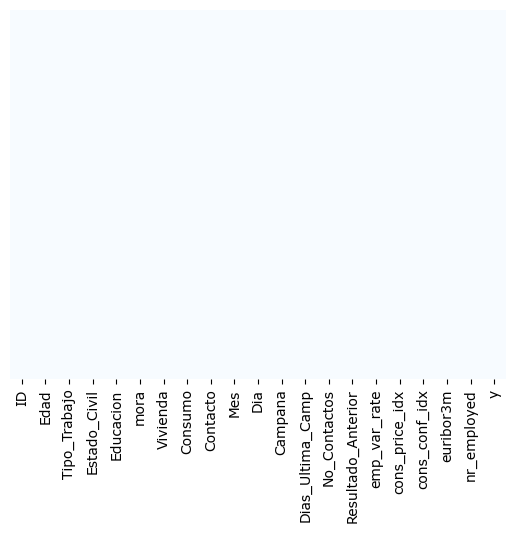

In [5]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Edad'}>,
        <AxesSubplot:title={'center':'Campana'}>],
       [<AxesSubplot:title={'center':'Dias_Ultima_Camp'}>,
        <AxesSubplot:title={'center':'No_Contactos'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>],
       [<AxesSubplot:title={'center':'cons_price_idx'}>,
        <AxesSubplot:title={'center':'cons_conf_idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr_employed'}>,
        <AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

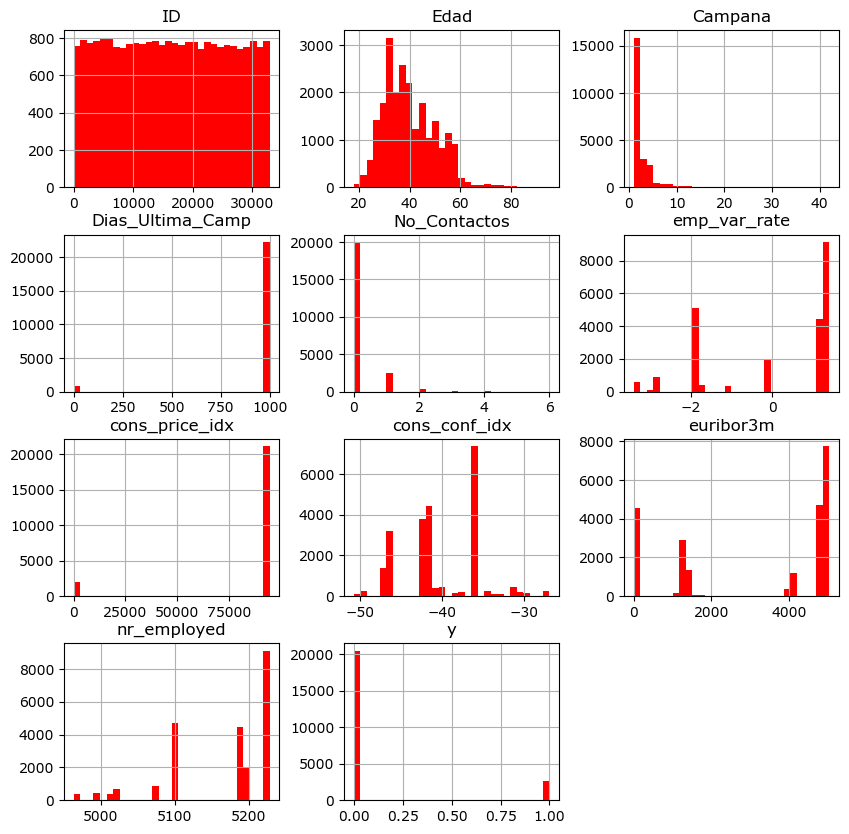

In [6]:
df.hist(bins = 30, figsize = (10,10), color = 'r')

### Comparación entre las poblaciones que si compran con las que no

In [7]:
df_si = df[df['y'] == 1]
df_no = df[df['y'] == 0]

In [8]:
print("Total =", len(df))

print("Número de clientes que compraron tarjeta de crédito =", len(df_si))
print("Porcentaje de clientes que compraron tarjeta de crédito =", 1.*len(df_si)/len(df)*100.0, "%")
 
print("Número de clientes que compraron tarjeta de crédito  =", len(df_no))
print("Porcentaje de clientes que compraron tarjeta de crédito =", 1.*len(df_no)/len(df)*100.0, "%")

Total = 23099
Número de clientes que compraron tarjeta de crédito = 2590
Porcentaje de clientes que compraron tarjeta de crédito = 11.212606606346595 %
Número de clientes que compraron tarjeta de crédito  = 20509
Porcentaje de clientes que compraron tarjeta de crédito = 88.7873933936534 %


In [9]:
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2590 entries, 45 to 23097
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2590 non-null   int64  
 1   Edad                2590 non-null   int64  
 2   Tipo_Trabajo        2590 non-null   object 
 3   Estado_Civil        2590 non-null   object 
 4   Educacion           2590 non-null   object 
 5   mora                2590 non-null   object 
 6   Vivienda            2590 non-null   object 
 7   Consumo             2590 non-null   object 
 8   Contacto            2590 non-null   object 
 9   Mes                 2590 non-null   object 
 10  Dia                 2590 non-null   object 
 11  Campana             2590 non-null   int64  
 12  Dias_Ultima_Camp    2590 non-null   int64  
 13  No_Contactos        2590 non-null   int64  
 14  Resultado_Anterior  2590 non-null   object 
 15  emp_var_rate        2590 non-null   float64
 16  cons

In [10]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20509 entries, 0 to 23098
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20509 non-null  int64  
 1   Edad                20509 non-null  int64  
 2   Tipo_Trabajo        20509 non-null  object 
 3   Estado_Civil        20509 non-null  object 
 4   Educacion           20509 non-null  object 
 5   mora                20509 non-null  object 
 6   Vivienda            20509 non-null  object 
 7   Consumo             20509 non-null  object 
 8   Contacto            20509 non-null  object 
 9   Mes                 20509 non-null  object 
 10  Dia                 20509 non-null  object 
 11  Campana             20509 non-null  int64  
 12  Dias_Ultima_Camp    20509 non-null  int64  
 13  No_Contactos        20509 non-null  int64  
 14  Resultado_Anterior  20509 non-null  object 
 15  emp_var_rate        20509 non-null  float64
 16  cons

### Correlaciones

<AxesSubplot:>

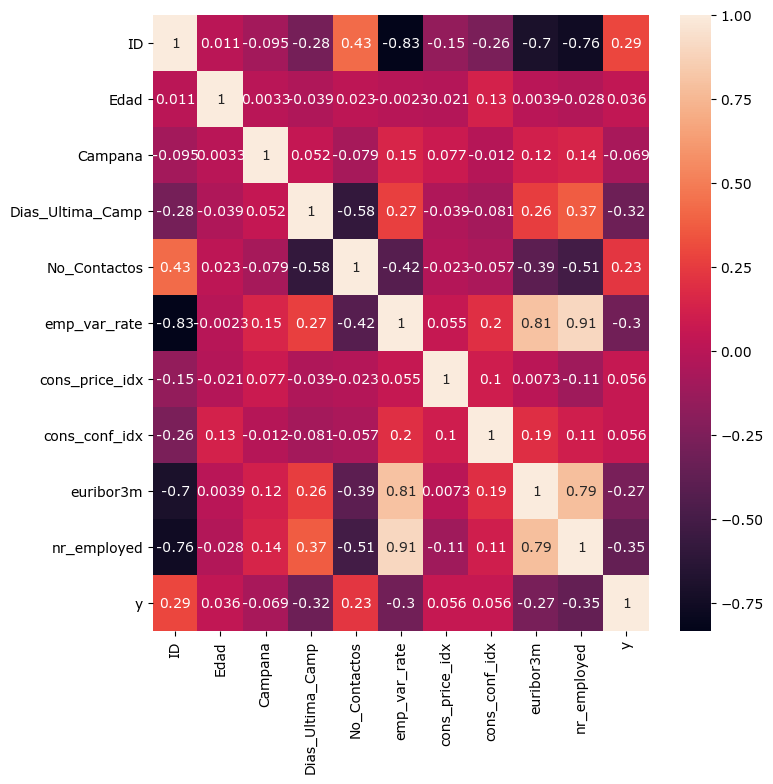

In [11]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(correlations, annot = True)

## Dispersiones

c:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Edad', ylabel='Density'>

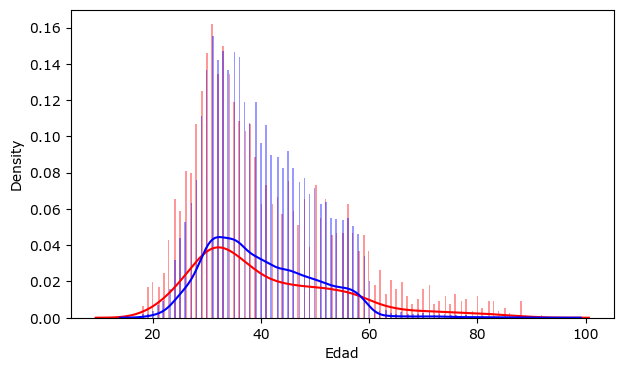

In [12]:
plt.figure(figsize=(7,4))

sns.distplot(df_si['Edad'], bins = 250, color = 'r')
sns.distplot(df_no['Edad'], bins = 250, color = 'b')

#plt.xlabel('Cantidad que debe en cuenta a septiembre de 2005 (dólar NT)')
#plt.xlim(0, 200000)

c:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Campana', ylabel='Density'>

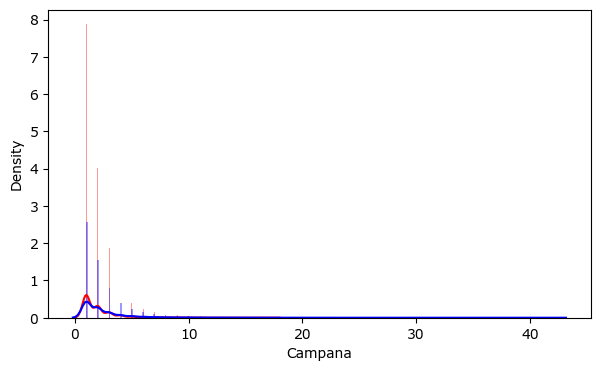

In [13]:
plt.figure(figsize=(7,4))

sns.distplot(df_si['Campana'], bins = 250, color = 'r')
sns.distplot(df_no['Campana'], bins = 250, color = 'b')

c:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nr_employed', ylabel='Density'>

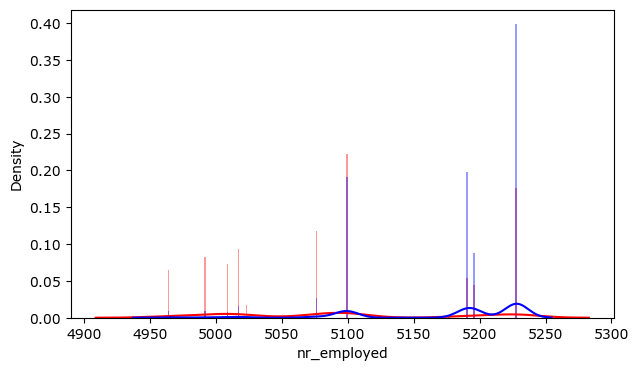

In [14]:
plt.figure(figsize=(7,4))

sns.distplot(df_si['nr_employed'], bins = 250, color = 'r')
sns.distplot(df_no['nr_employed'], bins = 250, color = 'b')

c:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='No_Contactos', ylabel='Density'>

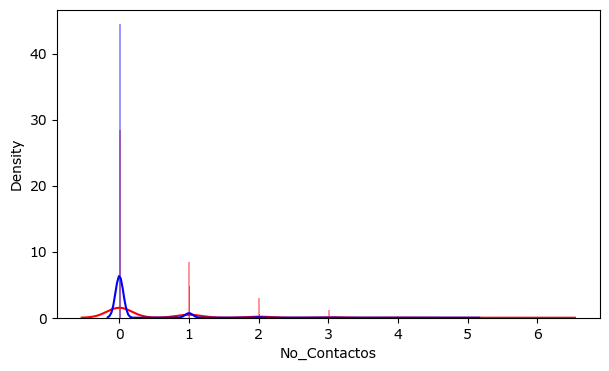

In [15]:
plt.figure(figsize=(7,4))

sns.distplot(df_si['No_Contactos'], bins = 250, color = 'r')
sns.distplot(df_no['No_Contactos'], bins = 250, color = 'b')

c:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Campana', ylabel='Density'>

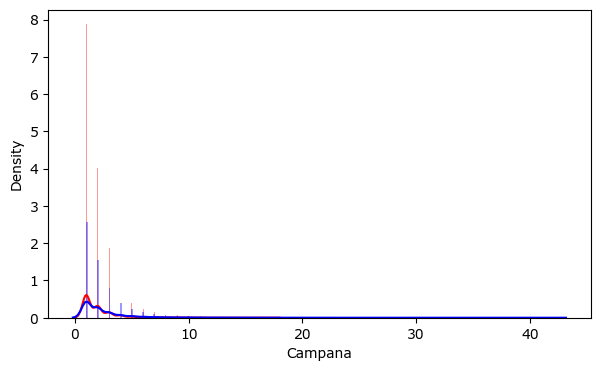

In [16]:
plt.figure(figsize=(7,4))

sns.distplot(df_si['Campana'], bins = 250, color = 'r')
sns.distplot(df_no['Campana'], bins = 250, color = 'b')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23099 entries, 0 to 23098
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  23099 non-null  int64  
 1   Edad                23099 non-null  int64  
 2   Tipo_Trabajo        23099 non-null  object 
 3   Estado_Civil        23099 non-null  object 
 4   Educacion           23099 non-null  object 
 5   mora                23099 non-null  object 
 6   Vivienda            23099 non-null  object 
 7   Consumo             23099 non-null  object 
 8   Contacto            23099 non-null  object 
 9   Mes                 23099 non-null  object 
 10  Dia                 23099 non-null  object 
 11  Campana             23099 non-null  int64  
 12  Dias_Ultima_Camp    23099 non-null  int64  
 13  No_Contactos        23099 non-null  int64  
 14  Resultado_Anterior  23099 non-null  object 
 15  emp_var_rate        23099 non-null  float64
 16  cons

In [18]:
len(df.Tipo_Trabajo.unique())

12

In [19]:
len(df.Estado_Civil.unique())

6

In [20]:
len(df.Educacion.unique())

8

In [21]:
len(df.mora.unique())

3

In [22]:
len(df.Vivienda.unique())

3

In [23]:
len(df.Consumo.unique())           

3

<AxesSubplot:xlabel='mora', ylabel='count'>

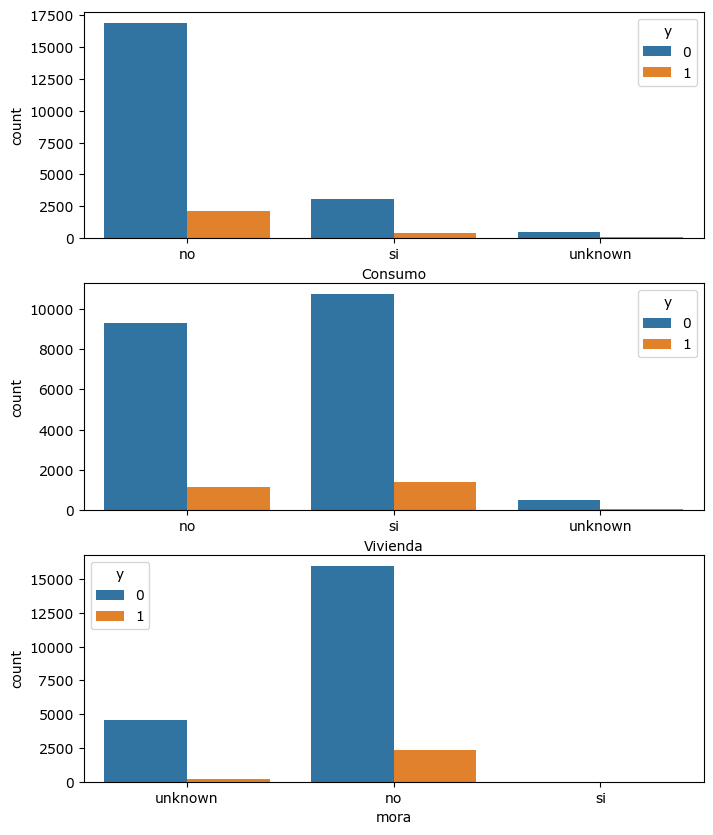

In [24]:
plt.figure(figsize=[8,10])
plt.subplot(311)
sns.countplot(x = 'Consumo', hue = 'y', data = df)
plt.subplot(312)
sns.countplot(x = 'Vivienda', hue = 'y', data = df)
plt.subplot(313)
sns.countplot(x = 'mora', hue = 'y', data = df)

<AxesSubplot:xlabel='Educacion', ylabel='count'>

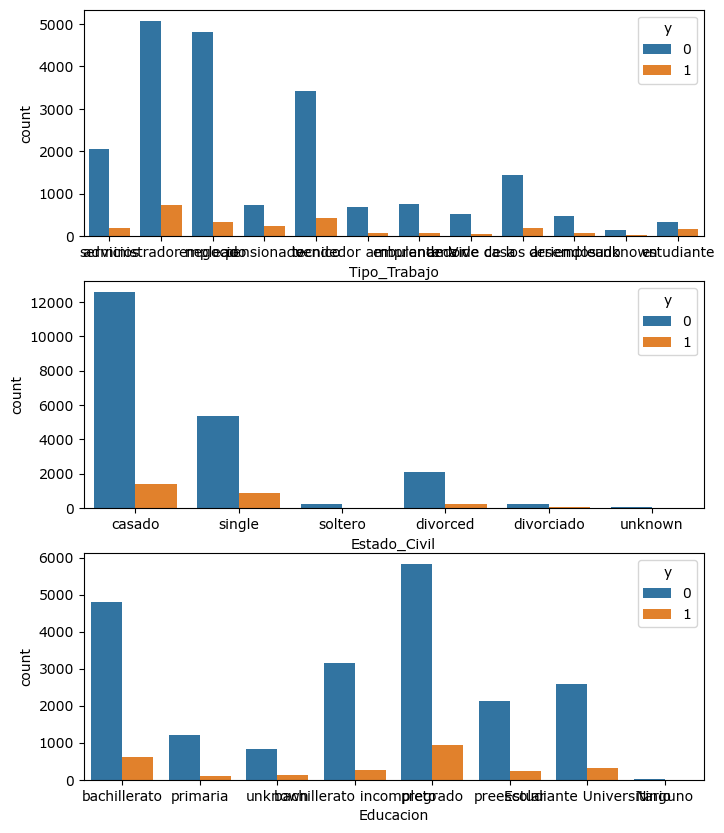

In [25]:
plt.figure(figsize=[8,10])
plt.subplot(311)
sns.countplot(x = 'Tipo_Trabajo', hue = 'y', data = df)
plt.subplot(312)
sns.countplot(x = 'Estado_Civil', hue = 'y', data = df)
plt.subplot(313)
sns.countplot(x = 'Educacion', hue = 'y', data = df)

# Transformación de datos para crear los dataset de entrenamiento y validación

In [245]:
var_cat = ['Tipo_Trabajo', 'Estado_Civil', 'Educacion', 'Vivienda', 'Consumo', 'Contacto', 'Mes', 'Dia', 'Resultado_Anterior']

X_cat = df[var_cat]

In [246]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [247]:
X_cat.shape

(23099, 52)

In [248]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23094,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23095,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [249]:
num_vars = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

X_numerical = df.select_dtypes(include=num_vars)
X_numerical = X_numerical.drop(['ID', 'y'], axis=1)
X_numerical

,Edad,Campana,Dias_Ultima_Camp,No_Contactos,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,57,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
1,37,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
2,40,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
3,56,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
4,25,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
...,...,...,...,...,...,...,...,...,...
23094,29,1,9,1,-1.1,94767.0,-50.8,1028.0,4963.6
23095,46,1,999,0,-1.1,94767.0,-50.8,1028.0,4963.6
23096,56,2,999,0,-1.1,94767.0,-50.8,1028.0,4963.6
23097,44,1,999,0,-1.1,94767.0,-50.8,1028.0,4963.6


In [250]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,Edad,Campana,Dias_Ultima_Camp,No_Contactos,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,57,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,40,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,56,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23094,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29,1,9,1,-1.1,94767.0,-50.8,1028.0,4963.6
23095,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,46,1,999,0,-1.1,94767.0,-50.8,1028.0,4963.6
23096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56,2,999,0,-1.1,94767.0,-50.8,1028.0,4963.6
23097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,44,1,999,0,-1.1,94767.0,-50.8,1028.0,4963.6


## Escalamiento para facilitar el aprendizaje de los algoritmos de optimización

In [251]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [252]:
y = df['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
23094    0
23095    0
23096    0
23097    1
23098    0
Name: y, Length: 23099, dtype: int64

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [254]:
X_train.shape

(17324, 61)

In [255]:
X_test.shape

(5775, 61)

# Entrenamiento de modelos 
1. Regresión Logística 
2. XGBOOST
3. Red Neuronal

## Logit

In [256]:
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

LogisticRegression()

Text(0.5, 33.222222222222214, 'Predicho')

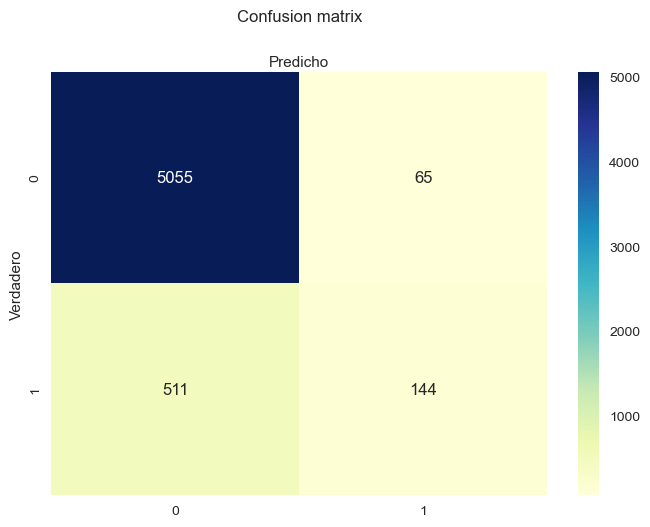

In [241]:
y_pred = pd.Series(model_1.predict(X_test))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Verdadero')
plt.xlabel('Predicho')

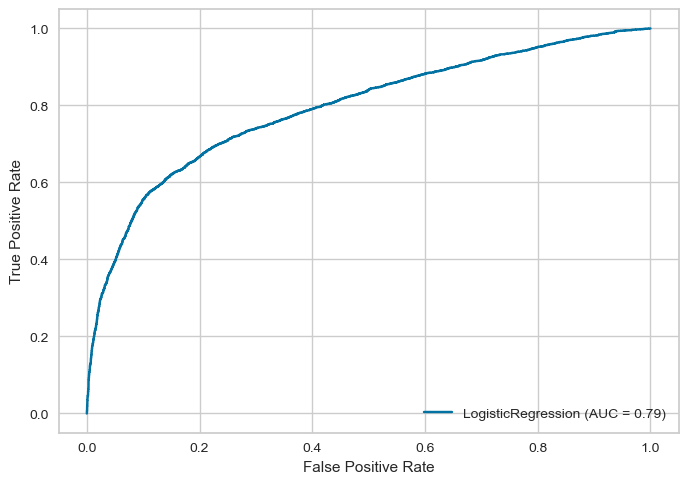

In [270]:
metrics.plot_roc_curve(model_1, X_test, y_test)
plt.show()

In [242]:
Counter(y)

Counter({0: 20509, 1: 2590})

In [243]:
conteo = Counter(y)
ratio = conteo[0]/conteo[1]
ratio

7.918532818532818

## XGBOOST

In [193]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

evalset = [(X_train, y_train), (X_test,y_test)]

model = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.001, max_depth = 5, n_estimators = 1000, scale_pos_weight=13)

model.fit(X_train, y_train, eval_metric='error', eval_set=evalset)

[0]	validation_0-error:0.21941	validation_1-error:0.22511
[1]	validation_0-error:0.21946	validation_1-error:0.22511
[2]	validation_0-error:0.21941	validation_1-error:0.22476
[3]	validation_0-error:0.21946	validation_1-error:0.22511
[4]	validation_0-error:0.21941	validation_1-error:0.22511
[5]	validation_0-error:0.21946	validation_1-error:0.22511
[6]	validation_0-error:0.21941	validation_1-error:0.22476
[7]	validation_0-error:0.21946	validation_1-error:0.22511
[8]	validation_0-error:0.21941	validation_1-error:0.22511
[9]	validation_0-error:0.21946	validation_1-error:0.22511
[10]	validation_0-error:0.21941	validation_1-error:0.22476
[11]	validation_0-error:0.21946	validation_1-error:0.22511
[12]	validation_0-error:0.21946	validation_1-error:0.22511
[13]	validation_0-error:0.21946	validation_1-error:0.22511
[14]	validation_0-error:0.21946	validation_1-error:0.22511
[15]	validation_0-error:0.21946	validation_1-error:0.22511
[16]	validation_0-error:0.21946	validation_1-error:0.22511
[17]	va

c:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20]	validation_0-error:0.21946	validation_1-error:0.22511
[21]	validation_0-error:0.21946	validation_1-error:0.22511
[22]	validation_0-error:0.21946	validation_1-error:0.22511
[23]	validation_0-error:0.21946	validation_1-error:0.22511
[24]	validation_0-error:0.21946	validation_1-error:0.22511
[25]	validation_0-error:0.21946	validation_1-error:0.22511
[26]	validation_0-error:0.21946	validation_1-error:0.22511
[27]	validation_0-error:0.21946	validation_1-error:0.22511
[28]	validation_0-error:0.21946	validation_1-error:0.22511
[29]	validation_0-error:0.21946	validation_1-error:0.22511
[30]	validation_0-error:0.21946	validation_1-error:0.22511
[31]	validation_0-error:0.21946	validation_1-error:0.22511
[32]	validation_0-error:0.21946	validation_1-error:0.22511
[33]	validation_0-error:0.21946	validation_1-error:0.22511
[34]	validation_0-error:0.21946	validation_1-error:0.22511
[35]	validation_0-error:0.21946	validation_1-error:0.22511
[36]	validation_0-error:0.21946	validation_1-error:0.225

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=13, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [194]:
y_pred = model.predict(X_test)

In [195]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [196]:
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 78.23376623376623 %


<AxesSubplot:>

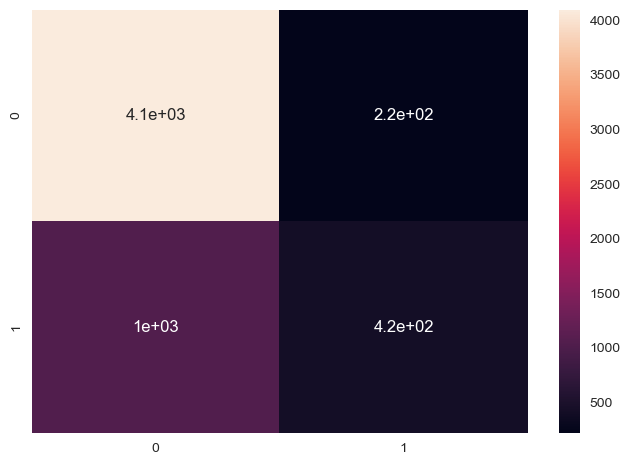

In [197]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      5136
           1       0.29      0.66      0.40       639

    accuracy                           0.78      5775
   macro avg       0.62      0.73      0.63      5775
weighted avg       0.88      0.78      0.82      5775



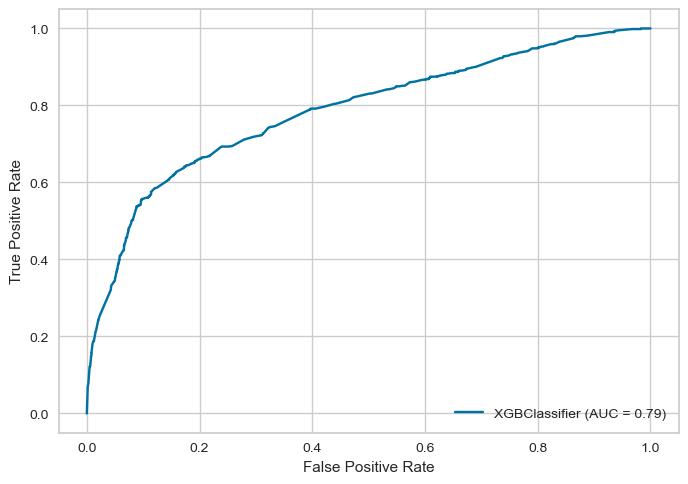

In [199]:
metrics.plot_roc_curve(model, X_test, y_test)
plt.show()

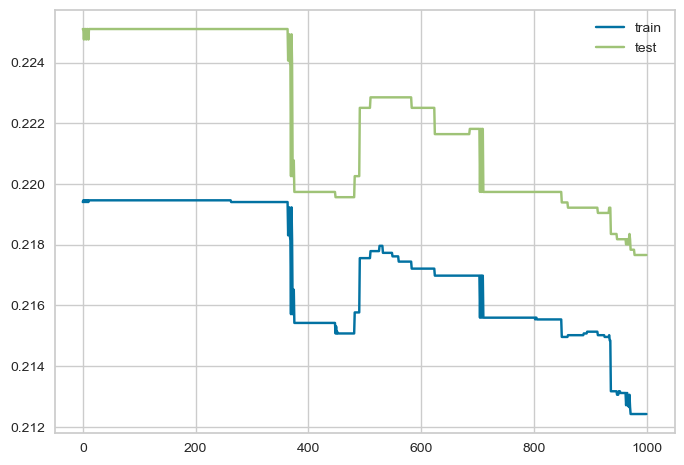

In [201]:
results = model.evals_result()

plt.plot(results['validation_0']['error'], label='train')
plt.plot(results['validation_1']['error'], label='test')

plt.legend()
plt.show()

In [88]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

In [91]:
model_nn = Sequential()
model_nn.add(Dense(500, activation='relu', input_dim=64))
model_nn.add(Dense(100, activation='relu'))
model_nn.add(Dense(50, activation='relu'))
model_nn.add(Dense(1, activation='softmax'))


model_nn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [92]:
model_nn.fit(X_train, y_train, epochs=20)

Epoch 1/20
542/542 [==============================] - 1s 917us/step - loss: 0.0000e+00 - accuracy: 0.1106
Epoch 2/20
542/542 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1110
Epoch 3/20
542/542 [==============================] - 1s 938us/step - loss: 0.0000e+00 - accuracy: 0.1154
Epoch 4/20
542/542 [==============================] - 0s 900us/step - loss: 0.0000e+00 - accuracy: 0.1176
Epoch 5/20
542/542 [==============================] - 0s 874us/step - loss: 0.0000e+00 - accuracy: 0.1086
Epoch 6/20
542/542 [==============================] - 0s 876us/step - loss: 0.0000e+00 - accuracy: 0.1138
Epoch 7/20
542/542 [==============================] - 0s 876us/step - loss: 0.0000e+00 - accuracy: 0.1111
Epoch 8/20
542/542 [==============================] - 0s 880us/step - loss: 0.0000e+00 - accuracy: 0.1122
Epoch 9/20
542/542 [==============================] - 0s 878us/step - loss: 0.0000e+00 - accuracy: 0.1151
Epoch 10/20
542/542 [===========================

In [93]:
pred_train= model_nn.predict(X_train)
scores = model_nn.evaluate(X_train, y_train, verbose=0)
print('Error en entrenamiento: {}% \n Accuracy en entrenamiento: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model_nn.predict(X_test)
scores2 = model_nn.evaluate(X_test, y_test, verbose=0)
print('Error en validación: {}% \n Accuracy en test: {}'.format(scores2[1], 1 - scores2[1]))  

Error en entrenamiento: 0.1126183345913887% 
 Accuracy en entrenamiento: 0.8873816654086113
Error en validación: 0.11064934730529785% 
 Accuracy en test: 0.8893506526947021


<AxesSubplot:>

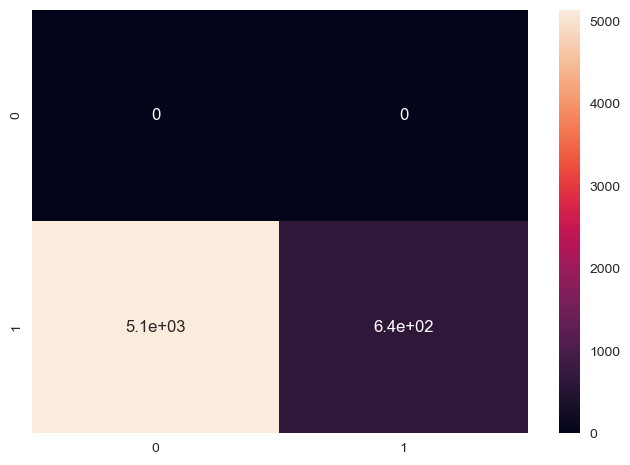

In [94]:
cm = confusion_matrix(pred_test, y_test)
sns.heatmap(cm, annot=True)

## Mejorando métricas
#### Se utiliza técnica SMOTE para mejorar métricas de desempeño debído a que la variabl objetivo se encuentra desbalanceada

In [271]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


evalset = [(X_train, y_train), (X_test,y_test)]

model = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.001, max_depth = 5, n_estimators = 1000)

model.fit(X_train, y_train, eval_metric='error', eval_set=evalset)

[0]	validation_0-error:0.20843	validation_1-error:0.20731
[1]	validation_0-error:0.20850	validation_1-error:0.20731
[2]	validation_0-error:0.20850	validation_1-error:0.20731
[3]	validation_0-error:0.20847	validation_1-error:0.20751
[4]	validation_0-error:0.20518	validation_1-error:0.20429
[5]	validation_0-error:0.20518	validation_1-error:0.20429
[6]	validation_0-error:0.20847	validation_1-error:0.20751
[7]	validation_0-error:0.20847	validation_1-error:0.20751
[8]	validation_0-error:0.20847	validation_1-error:0.20751


c:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[9]	validation_0-error:0.20518	validation_1-error:0.20429
[10]	validation_0-error:0.20518	validation_1-error:0.20429
[11]	validation_0-error:0.20518	validation_1-error:0.20429
[12]	validation_0-error:0.20726	validation_1-error:0.20614
[13]	validation_0-error:0.20726	validation_1-error:0.20614
[14]	validation_0-error:0.20518	validation_1-error:0.20429
[15]	validation_0-error:0.20518	validation_1-error:0.20429
[16]	validation_0-error:0.20518	validation_1-error:0.20429
[17]	validation_0-error:0.20518	validation_1-error:0.20429
[18]	validation_0-error:0.20726	validation_1-error:0.20614
[19]	validation_0-error:0.20726	validation_1-error:0.20614
[20]	validation_0-error:0.20518	validation_1-error:0.20429
[21]	validation_0-error:0.20518	validation_1-error:0.20429
[22]	validation_0-error:0.20476	validation_1-error:0.20624
[23]	validation_0-error:0.20476	validation_1-error:0.20624
[24]	validation_0-error:0.20684	validation_1-error:0.20809
[25]	validation_0-error:0.20476	validation_1-error:0.2062

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [272]:
y_pred = model.predict(X_test)
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 81.21891760117016 %


<AxesSubplot:>

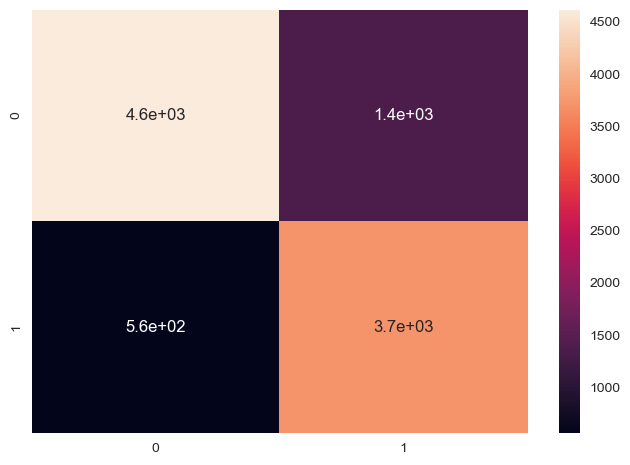

In [273]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

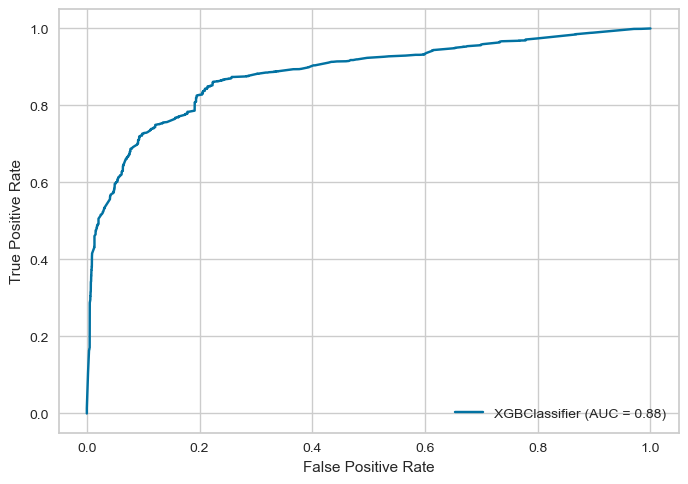

In [274]:
metrics.plot_roc_curve(model, X_test, y_test)
plt.show()

In [275]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      5171
           1       0.87      0.73      0.79      5084

    accuracy                           0.81     10255
   macro avg       0.82      0.81      0.81     10255
weighted avg       0.82      0.81      0.81     10255



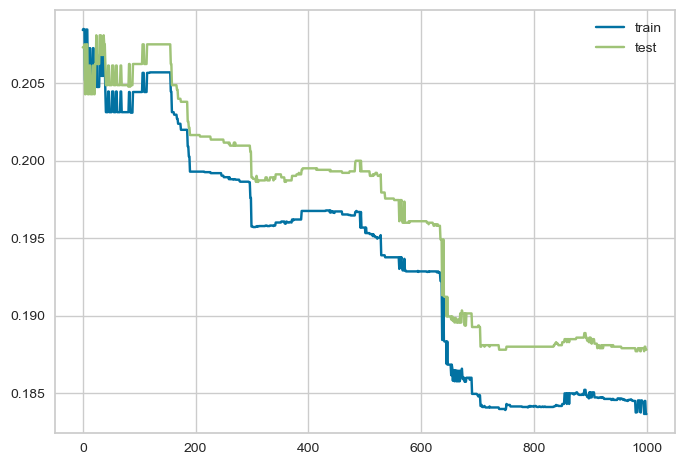

In [276]:
results = model.evals_result()

plt.plot(results['validation_0']['error'], label='train')
plt.plot(results['validation_1']['error'], label='test')

plt.legend()
plt.show()

## Validando con los datos de test y prediciendo

In [262]:
df = pd.read_csv('../data/interim/test.csv')

df

,ID,Edad,Tipo_Trabajo,Estado_Civil,Educacion,mora,Vivienda,Consumo,Contacto,Mes,Dia,Campana,Dias_Ultima_Camp,No_Contactos,Resultado_Anterior,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,5,41,empleado,casado,unknown,unknown,no,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0
1,6,24,tecnico,single,Estudiante Universitario,no,si,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0
2,11,57,ama de casa,divorciado,preescolar,no,si,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0
3,13,54,pensionado,casado,bachillerato incompleto,unknown,si,si,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0
4,16,39,Vive de los arriendos,single,bachillerato incompleto,unknown,no,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,32941,35,tecnico,divorciado,preescolar,no,no,no,celular,nov,tue,1,999,0,sin contacto,-1.1,94767.0,-50.8,1035.0,4963.6
9864,32946,35,tecnico,divorciado,preescolar,no,si,no,celular,nov,tue,3,4,2,satisfactorio,-1.1,94767.0,-50.8,1035.0,4963.6
9865,32952,33,estudiante,casado,Estudiante Universitario,no,si,no,telefono fijo,nov,thu,1,999,0,sin contacto,-1.1,94767.0,-50.8,1031.0,4963.6
9866,32958,57,pensionado,casado,Estudiante Universitario,no,si,no,celular,nov,thu,6,999,0,sin contacto,-1.1,94767.0,-50.8,1031.0,4963.6


In [263]:
var_cat = ['Tipo_Trabajo', 'Estado_Civil', 'Educacion', 'Vivienda', 'Consumo', 'Contacto', 'Mes', 'Dia', 'Resultado_Anterior']

X_cat = df[var_cat]

onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

X_cat = pd.DataFrame(X_cat)

num_vars = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

X_numerical = df.select_dtypes(include=num_vars)
X_numerical = X_numerical.drop(['ID'], axis=1)

X_all = pd.concat([X_cat, X_numerical], axis = 1)

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X_all)

In [266]:
y_pred_ = model.predict(X_)
y_pred_

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [268]:
df['prediccion'] = y_pred_
df

,ID,Edad,Tipo_Trabajo,Estado_Civil,Educacion,mora,Vivienda,Consumo,Contacto,Mes,Dia,Campana,Dias_Ultima_Camp,No_Contactos,Resultado_Anterior,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,prediccion
0,5,41,empleado,casado,unknown,unknown,no,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
1,6,24,tecnico,single,Estudiante Universitario,no,si,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
2,11,57,ama de casa,divorciado,preescolar,no,si,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
3,13,54,pensionado,casado,bachillerato incompleto,unknown,si,si,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
4,16,39,Vive de los arriendos,single,bachillerato incompleto,unknown,no,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,32941,35,tecnico,divorciado,preescolar,no,no,no,celular,nov,tue,1,999,0,sin contacto,-1.1,94767.0,-50.8,1035.0,4963.6,1
9864,32946,35,tecnico,divorciado,preescolar,no,si,no,celular,nov,tue,3,4,2,satisfactorio,-1.1,94767.0,-50.8,1035.0,4963.6,1
9865,32952,33,estudiante,casado,Estudiante Universitario,no,si,no,telefono fijo,nov,thu,1,999,0,sin contacto,-1.1,94767.0,-50.8,1031.0,4963.6,0
9866,32958,57,pensionado,casado,Estudiante Universitario,no,si,no,celular,nov,thu,6,999,0,sin contacto,-1.1,94767.0,-50.8,1031.0,4963.6,1


In [269]:
df.to_csv('../data/processed/predicciones.csv', sep=';', index=False)